In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df= pd.read_csv('C://Users//User//Desktop//MSc Westminster//Dissertation//DataSets//Heart_Attack_Prediction.csv')

In [2]:
df['Sex']= df['Sex'].map({'Female': 0, 'Male': 1}).astype(int)
df['Diet']= df['Diet'].map({'Healthy': 0, 'Average': 1, 'Unhealthy': 2}).astype(int)
df[['HBP', 'LBP']]= df['Blood Pressure'].str.split('/', expand= True).astype(int)
df['Diabetes']= df['Diabetes'].map({0: 1, 1: 0}).astype(int)
df['Exercise Hours Per Week']= df['Exercise Hours Per Week'].round(0).astype(int)
df['Sedentary Hours Per Day']= df['Sedentary Hours Per Day'].round(0).astype(int)
df['Income']= df['Income'].round(0).astype(int)
df['BMI']= df['BMI'].round(0).astype(int)

df= df.drop(columns= ['Patient ID', 'Blood Pressure', 'Country', 'Continent', 'Hemisphere'])

In [3]:
categorical_columns= ['Sex', 'Diabetes', 'Family History', 'Smoking', 'Obesity', 'Alcohol Consumption', 
                       'Diet', 'Previous Heart Problems', 'Medication Use', 'Heart Attack Risk']

df[categorical_columns]= df[categorical_columns].astype(str)

df= pd.get_dummies(df, columns= categorical_columns, drop_first= True)

continuous_columns= ['Age', 'Cholesterol', 'Heart Rate', 'Exercise Hours Per Week', 'Stress Level', 
                      'Sedentary Hours Per Day', 'Income', 'BMI', 'Triglycerides', 
                      'Physical Activity Days Per Week', 'Sleep Hours Per Day', 'HBP', 'LBP']

for column in continuous_columns:
    if df[column].dtype== 'int64':
        df[column]= df[column].astype('int16')
    elif df[column].dtype== 'float64':
        df[column]= df[column].astype('float16')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 24 columns):
 #   Column                           Non-Null Count  Dtype
---  ------                           --------------  -----
 0   Age                              8763 non-null   int16
 1   Cholesterol                      8763 non-null   int16
 2   Heart Rate                       8763 non-null   int16
 3   Exercise Hours Per Week          8763 non-null   int32
 4   Stress Level                     8763 non-null   int16
 5   Sedentary Hours Per Day          8763 non-null   int32
 6   Income                           8763 non-null   int32
 7   BMI                              8763 non-null   int32
 8   Triglycerides                    8763 non-null   int16
 9   Physical Activity Days Per Week  8763 non-null   int16
 10  Sleep Hours Per Day              8763 non-null   int16
 11  HBP                              8763 non-null   int32
 12  LBP                              8763 non-null  

In [5]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,8763.0,53.707977,21.249509,18.0,35.0,54.0,72.0,90.0
Cholesterol,8763.0,259.877211,80.863276,120.0,192.0,259.0,330.0,400.0
Heart Rate,8763.0,75.021682,20.550948,40.0,57.0,75.0,93.0,110.0
Exercise Hours Per Week,8763.0,10.009700,5.797938,0.0,5.0,10.0,15.0,20.0
Stress Level,8763.0,5.469702,2.859622,1.0,3.0,5.0,8.0,10.0
Sedentary Hours Per Day,8763.0,5.989387,3.491569,0.0,3.0,6.0,9.0,12.0
Income,8763.0,158263.181901,80575.190806,20062.0,88310.0,157866.0,227749.0,299954.0
BMI,8763.0,28.886454,6.328903,18.0,23.0,29.0,34.0,40.0
Triglycerides,8763.0,417.677051,223.748137,30.0,225.5,417.0,612.0,800.0
Physical Activity Days Per Week,8763.0,3.489672,2.282687,0.0,2.0,3.0,5.0,7.0


In [6]:
X= df.drop(['Heart Attack Risk_1'], axis= 1)
y= df['Heart Attack Risk_1']

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size= 0.2, random_state= 15, stratify= y)

In [8]:
from sklearn.preprocessing import StandardScaler
ss= StandardScaler()
X_train= ss.fit_transform(X_train)
X_test= ss.transform(X_test)

--- LogisticRegression ---

              precision    recall  f1-score   support

           0       0.64      1.00      0.78      1125
           1       0.00      0.00      0.00       628

    accuracy                           0.64      1753
   macro avg       0.32      0.50      0.39      1753
weighted avg       0.41      0.64      0.50      1753

Precision: 0.0
Accuracy: 0.6417569880205363
AUC: 0.4789922151450814


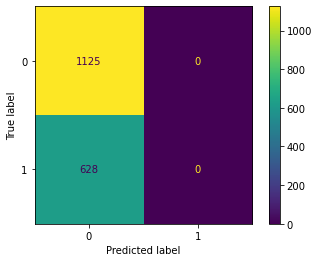

In [9]:
from sklearn.linear_model import LogisticRegression
lr= LogisticRegression(max_iter= 1000, random_state=15)
lr.fit(X_train, y_train)
y_pred_lr= lr.predict(X_test)
y_pred_prob_lr= lr.predict_proba(X_test)[:,1]

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, precision_score, roc_auc_score, accuracy_score 
cm= confusion_matrix(y_test, y_pred_lr, labels= lr.classes_)
print(classification_report(y_test, y_pred_lr, zero_division=0))
print('Precision:', precision_score(y_test, y_pred_lr, zero_division=0))
print('Accuracy:', accuracy_score(y_test, y_pred_lr))
print('AUC:', roc_auc_score(y_test, y_pred_prob_lr))
dcm_lr= ConfusionMatrixDisplay(cm, display_labels= lr.classes_)
dcm_lr.plot()

--- DecisionTreeClassifier ---

              precision    recall  f1-score   support

           0       0.64      0.61      0.62      1125
           1       0.35      0.37      0.36       628

    accuracy                           0.52      1753
   macro avg       0.49      0.49      0.49      1753
weighted avg       0.53      0.52      0.53      1753

Precision: 0.3476968796433878
Accuracy: 0.5248146035367941
AUC: 0.4911946213729653


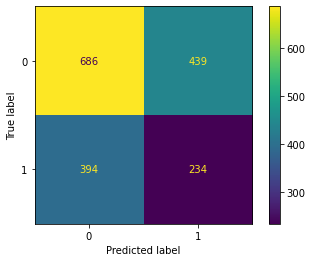

In [10]:
from sklearn.tree import DecisionTreeClassifier
dt= DecisionTreeClassifier(random_state=15)
dt.fit(X_train, y_train)
y_pred_dt= dt.predict(X_test)
y_pred_prob_dt= dt.predict_proba(X_test)[:,1]

cm= confusion_matrix(y_test, y_pred_dt, labels= dt.classes_)
print(classification_report(y_test, y_pred_dt, zero_division=0))
print('Precision:', precision_score(y_test, y_pred_dt, zero_division=0))
print('Accuracy:', accuracy_score(y_test, y_pred_dt))
print('AUC:', roc_auc_score(y_test, y_pred_prob_dt))
dcm_dt= ConfusionMatrixDisplay(cm, display_labels= dt.classes_)
dcm_dt.plot()

--- Tuned - DecisionTreeClassifier ---

In [11]:
from sklearn.model_selection import GridSearchCV
param_grid= {
             'max_depth': [None, 10, 20, 30, 40, 50],
             'min_samples_split': [2, 10, 20],
             'min_samples_leaf': [1, 5, 10],
             'max_features': [None, 'sqrt', 'log2'],
             'criterion': ['gini', 'entropy']
            }

gs_dt= GridSearchCV(estimator= dt, param_grid= param_grid, cv= 5, scoring= 'precision')
gs_dt.fit(X_train, y_train)

print("Best Parameters:", gs_dt.best_params_)
print("Best Precision Score:", gs_dt.best_score_)

Best Parameters: {'criterion': 'entropy', 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 5, 'min_samples_split': 2}
Best Precision Score: 0.4045629743672852


              precision    recall  f1-score   support

           0       0.65      0.85      0.73      1125
           1       0.38      0.17      0.24       628

    accuracy                           0.60      1753
   macro avg       0.51      0.51      0.48      1753
weighted avg       0.55      0.60      0.55      1753

Precision: 0.3821428571428571
Accuracy: 0.6041072447233314
AUC: 0.5039858457183297


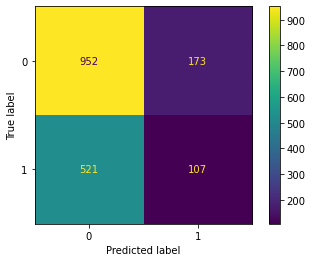

In [12]:
tuned_dt= gs_dt.best_estimator_
y_pred_tuned_dt= tuned_dt.predict(X_test)
y_pred_prob_tuned_dt= tuned_dt.predict_proba(X_test)[:,1]

cm= confusion_matrix(y_test, y_pred_tuned_dt, labels= tuned_dt.classes_)
print(classification_report(y_test, y_pred_tuned_dt, zero_division=0))
print('Precision:', precision_score(y_test, y_pred_tuned_dt, zero_division=0))
print('Accuracy:', accuracy_score(y_test, y_pred_tuned_dt))
print('AUC:', roc_auc_score(y_test, y_pred_prob_tuned_dt))
dcm_tuned_dt= ConfusionMatrixDisplay(cm, display_labels= tuned_dt.classes_)
dcm_tuned_dt.plot()

--- KNeighborsClassifier ---

              precision    recall  f1-score   support

           0       0.64      0.76      0.70      1125
           1       0.36      0.25      0.29       628

    accuracy                           0.57      1753
   macro avg       0.50      0.50      0.49      1753
weighted avg       0.54      0.57      0.55      1753

Precision: 0.3615023474178404
Accuracy: 0.5744438106103822
AUC: 0.49119674451521583


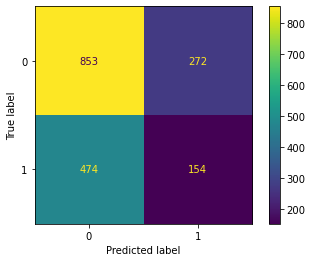

In [13]:
from sklearn.neighbors import KNeighborsClassifier
knn= KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred_knn= knn.predict(X_test)
y_pred_prob_knn= knn.predict_proba(X_test)[:,1]

cm= confusion_matrix(y_test, y_pred_knn, labels= knn.classes_)
print(classification_report(y_test, y_pred_knn, zero_division=0))
print('Precision:', precision_score(y_test, y_pred_knn, zero_division=0))
print('Accuracy:', accuracy_score(y_test, y_pred_knn))
print('AUC:', roc_auc_score(y_test, y_pred_prob_knn))
dcm_knn= ConfusionMatrixDisplay(cm, display_labels= knn.classes_)
dcm_knn.plot()

--- Tuned - KNeighborsClassifier ---

In [14]:
param_grid= {
             'n_neighbors': np.arange(1,40),
             'weights': ['uniform', 'distance'],
             'metric': ['euclidean', 'manhattan', 'minkowski']
            }

gs_knn= GridSearchCV(estimator= knn, param_grid= param_grid, cv=5, scoring= 'precision')
gs_knn.fit(X_train, y_train)
print("Best Parameters:", gs_knn.best_params_)
print("Best Precision Score:", gs_knn.best_score_)

Best Parameters: {'metric': 'manhattan', 'n_neighbors': 32, 'weights': 'uniform'}
Best Precision Score: 0.39897836107470935


              precision    recall  f1-score   support

           0       0.64      0.97      0.77      1125
           1       0.43      0.04      0.08       628

    accuracy                           0.64      1753
   macro avg       0.54      0.51      0.42      1753
weighted avg       0.57      0.64      0.52      1753

Precision: 0.4262295081967213
Accuracy: 0.6366229321163719
AUC: 0.4940481245576787


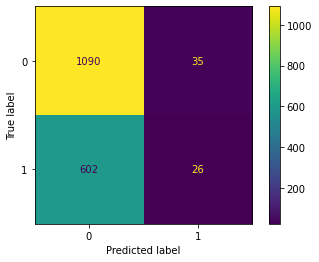

In [15]:
tuned_knn= gs_knn.best_estimator_
y_pred_tuned_knn= tuned_knn.predict(X_test)
y_pred_prob_tuned_knn= tuned_knn.predict_proba(X_test)[:,1]

cm= confusion_matrix(y_test, y_pred_tuned_knn, labels= tuned_knn.classes_)
print(classification_report(y_test, y_pred_tuned_knn, zero_division=0))
print('Precision:', precision_score(y_test, y_pred_tuned_knn, zero_division=0))
print('Accuracy:', accuracy_score(y_test, y_pred_tuned_knn))
print('AUC:', roc_auc_score(y_test, y_pred_prob_tuned_knn))
dcm_tuned_knn= ConfusionMatrixDisplay(cm, display_labels= tuned_knn.classes_)
dcm_tuned_knn.plot()

--- GaussianNB ---

              precision    recall  f1-score   support

           0       0.64      1.00      0.78      1125
           1       0.00      0.00      0.00       628

    accuracy                           0.64      1753
   macro avg       0.32      0.50      0.39      1753
weighted avg       0.41      0.64      0.50      1753

Precision: 0.0
Accuracy: 0.6417569880205363
AUC: 0.48782873319179054


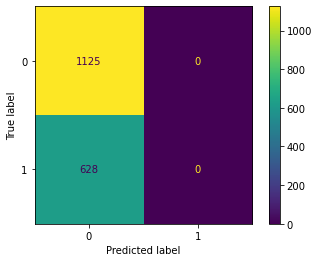

In [16]:
from sklearn.naive_bayes import GaussianNB
nb= GaussianNB()
nb.fit(X_train, y_train)
y_pred_nb= nb.predict(X_test)
y_pred_prob_nb= nb.predict_proba(X_test)[:,1]

cm= confusion_matrix(y_test, y_pred_nb, labels= nb.classes_)
print(classification_report(y_test, y_pred_nb, zero_division=0))
print('Precision:', precision_score(y_test, y_pred_nb, zero_division=0))
print('Accuracy:', accuracy_score(y_test, y_pred_nb))
print('AUC:', roc_auc_score(y_test, y_pred_prob_nb))
dcm_nb= ConfusionMatrixDisplay(cm, display_labels= nb.classes_)
dcm_nb.plot()

--- SVM ---

              precision    recall  f1-score   support

           0       0.64      1.00      0.78      1125
           1       0.00      0.00      0.00       628

    accuracy                           0.64      1753
   macro avg       0.32      0.50      0.39      1753
weighted avg       0.41      0.64      0.50      1753

Precision: 0.0
Accuracy: 0.6417569880205363
AUC: 0.5144614295824487


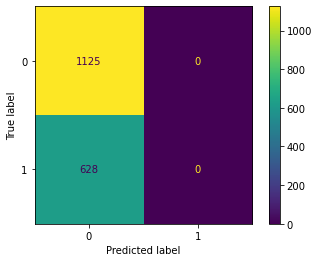

In [17]:
from sklearn.svm import SVC
svc= SVC(kernel= 'rbf', gamma= 1, probability=True, random_state=15)
svc.fit(X_train, y_train)
y_pred_svc= svc.predict(X_test)
y_pred_prob_svc= svc.predict_proba(X_test)[:,1]

cm= confusion_matrix(y_test, y_pred_svc, labels= svc.classes_)
print(classification_report(y_test, y_pred_svc, zero_division=0))
print('Precision:', precision_score(y_test, y_pred_svc, zero_division=0))
print('Accuracy:', accuracy_score(y_test, y_pred_svc))
print('AUC:', roc_auc_score(y_test, y_pred_prob_svc))
dcm_svc= ConfusionMatrixDisplay(cm, display_labels= svc.classes_)
dcm_svc.plot()

--- Random Forest ---

In [18]:
from sklearn.ensemble import RandomForestClassifier
rf= RandomForestClassifier(random_state=15)
rf.fit(X_train, y_train)
y_pred_rf= rf.predict(X_test)
y_pred_prob_rf= rf.predict_proba(X_test)[:,1]

              precision    recall  f1-score   support

           0       0.64      0.97      0.77      1125
           1       0.28      0.02      0.04       628

    accuracy                           0.63      1753
   macro avg       0.46      0.50      0.40      1753
weighted avg       0.51      0.63      0.51      1753

Precision: 0.2765957446808511
Accuracy: 0.6297775242441529
AUC: 0.5087275300778487


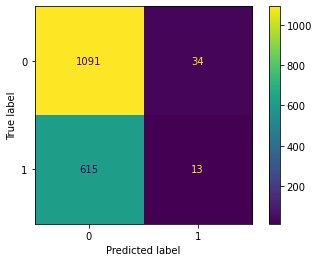

In [19]:
cm= confusion_matrix(y_test, y_pred_rf, labels= rf.classes_)
print(classification_report(y_test, y_pred_rf, zero_division=0))
print('Precision:', precision_score(y_test, y_pred_rf, zero_division=0))
print('Accuracy:', accuracy_score(y_test, y_pred_rf))
print('AUC:', roc_auc_score(y_test, y_pred_prob_rf))
dcm_rf= ConfusionMatrixDisplay(cm, display_labels= rf.classes_)
dcm_rf.plot()

In [20]:
param_grid= {
             'n_estimators': [100, 200, 300],
             'max_depth': [None, 10, 20, 30],
             'min_samples_split': [2, 5, 10],
             'min_samples_leaf': [1, 2, 4],
            }

gs_tuned_rf= GridSearchCV(estimator= rf, param_grid= param_grid, cv= 5, scoring= 'precision', n_jobs= -1, verbose= 2)
gs_tuned_rf.fit(X_train, y_train)
print("Best Parameters:", gs_tuned_rf.best_params_)
print("Best Precision Score:", gs_tuned_rf.best_score_)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Parameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 300}
Best Precision Score: 0.7071428571428571


              precision    recall  f1-score   support

           0       0.64      1.00      0.78      1125
           1       0.29      0.00      0.01       628

    accuracy                           0.64      1753
   macro avg       0.46      0.50      0.39      1753
weighted avg       0.51      0.64      0.50      1753

Precision: 0.2857142857142857
Accuracy: 0.6400456360524814
AUC: 0.5027091295116772


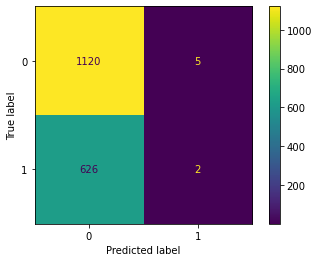

In [21]:
tuned_rf= gs_tuned_rf.best_estimator_
y_pred_tuned_rf= tuned_rf.predict(X_test)
y_pred_prob_tuned_rf= tuned_rf.predict_proba(X_test)[:,1]

cm= confusion_matrix(y_test, y_pred_tuned_rf, labels= tuned_rf.classes_)
print(classification_report(y_test, y_pred_tuned_rf, zero_division=0))
print('Precision:', precision_score(y_test, y_pred_tuned_rf, zero_division=0))
print('Accuracy:', accuracy_score(y_test, y_pred_tuned_rf))
print('AUC:', roc_auc_score(y_test, y_pred_prob_tuned_rf))
dcm_tuned_rf= ConfusionMatrixDisplay(cm, display_labels= tuned_rf.classes_)
dcm_tuned_rf.plot()

--- AdaBoost ---

In [22]:
from sklearn.ensemble import AdaBoostClassifier
ada= AdaBoostClassifier(random_state=15)
ada.fit(X_train, y_train)
y_pred_ada= ada.predict(X_test)
y_pred_prob_ada= ada.predict_proba(X_test)[:,1]

              precision    recall  f1-score   support

           0       0.64      0.98      0.78      1125
           1       0.28      0.01      0.02       628

    accuracy                           0.64      1753
   macro avg       0.46      0.50      0.40      1753
weighted avg       0.51      0.64      0.51      1753

Precision: 0.28
Accuracy: 0.6354820308043354
AUC: 0.47963481953290865


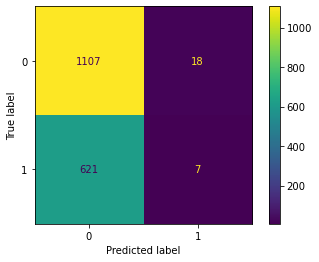

In [23]:
cm= confusion_matrix(y_test, y_pred_ada, labels= ada.classes_)
print(classification_report(y_test, y_pred_ada, zero_division=0))
print('Precision:', precision_score(y_test, y_pred_ada, zero_division=0))
print('Accuracy:', accuracy_score(y_test, y_pred_ada))
print('AUC:', roc_auc_score(y_test, y_pred_prob_ada))
dcm_ada= ConfusionMatrixDisplay(cm, display_labels= ada.classes_)
dcm_ada.plot()

In [24]:
param_grid= {'n_estimators': [50, 100, 200]}

gs_ada= GridSearchCV(estimator= ada, param_grid= param_grid, cv= 5, scoring= 'precision', n_jobs= -1, verbose= 2)
gs_ada.fit(X_train, y_train)
print("Best Parameters:", gs_ada.best_params_)
print("Best Precision Score:", gs_ada.best_score_)

Fitting 5 folds for each of 3 candidates, totalling 15 fits
Best Parameters: {'n_estimators': 100}
Best Precision Score: 0.4062753783684016


              precision    recall  f1-score   support

           0       0.64      0.98      0.78      1125
           1       0.38      0.02      0.04       628

    accuracy                           0.64      1753
   macro avg       0.51      0.50      0.41      1753
weighted avg       0.55      0.64      0.51      1753

Precision: 0.375
Accuracy: 0.6360524814603536
AUC: 0.4892271762208068


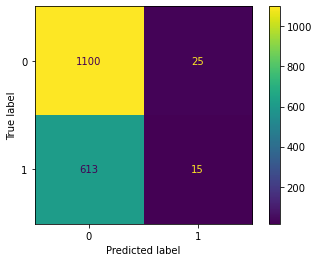

In [25]:
tuned_ada= gs_ada.best_estimator_
y_pred_tuned_ada= tuned_ada.predict(X_test)
y_pred_prob_tuned_ada= tuned_ada.predict_proba(X_test)[:,1]

cm= confusion_matrix(y_test, y_pred_tuned_ada, labels= tuned_ada.classes_)
print(classification_report(y_test, y_pred_tuned_ada, zero_division=0))
print('Precision:', precision_score(y_test, y_pred_tuned_ada, zero_division=0))
print('Accuracy:', accuracy_score(y_test, y_pred_tuned_ada))
print('AUC:', roc_auc_score(y_test, y_pred_prob_tuned_ada))
dcm_tuned_ada= ConfusionMatrixDisplay(cm, display_labels= tuned_ada.classes_)
dcm_tuned_ada.plot()

--- GradientBoosting ---

              precision    recall  f1-score   support

           0       0.64      0.98      0.78      1125
           1       0.30      0.01      0.03       628

    accuracy                           0.63      1753
   macro avg       0.47      0.50      0.40      1753
weighted avg       0.52      0.63      0.51      1753

Precision: 0.3
Accuracy: 0.6349115801483172
AUC: 0.5085704175513093


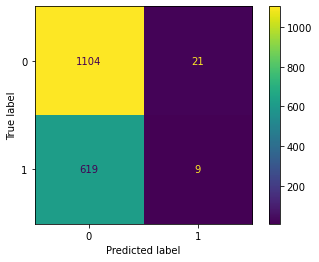

In [26]:
from sklearn.ensemble import GradientBoostingClassifier
grb= GradientBoostingClassifier(random_state=15)
grb.fit(X_train, y_train)
y_pred_grb= grb.predict(X_test)
y_pred_prob_grb= grb.predict_proba(X_test)[:,1]

cm= confusion_matrix(y_test, y_pred_grb, labels= grb.classes_)
print(classification_report(y_test, y_pred_grb, zero_division=0))
print('Precision:', precision_score(y_test, y_pred_grb, zero_division=0))
print('Accuracy:', accuracy_score(y_test, y_pred_grb))
print('AUC:', roc_auc_score(y_test, y_pred_prob_grb))
dcm_grb= ConfusionMatrixDisplay(cm, display_labels= grb.classes_)
dcm_grb.plot()

In [27]:
param_grid= {'learning_rate': [0.01, 0.1, 0.2]}

gs_grb= GridSearchCV(estimator= grb, param_grid= param_grid, cv= 5, scoring= 'precision', n_jobs= -1, verbose= 2)
gs_grb.fit(X_train, y_train)

print("Best Parameters:", gs_grb.best_params_)
print("Best Precision Score:", gs_grb.best_score_)

Fitting 5 folds for each of 3 candidates, totalling 15 fits
Best Parameters: {'learning_rate': 0.1}
Best Precision Score: 0.3971706454465075


              precision    recall  f1-score   support

           0       0.64      0.98      0.78      1125
           1       0.30      0.01      0.03       628

    accuracy                           0.63      1753
   macro avg       0.47      0.50      0.40      1753
weighted avg       0.52      0.63      0.51      1753

Precision: 0.3
Accuracy: 0.6349115801483172
AUC: 0.5085704175513093


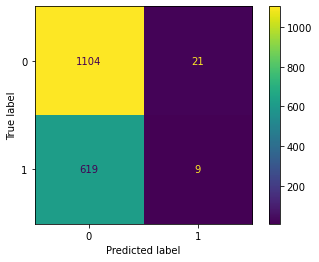

In [28]:
tuned_grb= gs_grb.best_estimator_
y_pred_tuned_grb= tuned_grb.predict(X_test)
y_pred_prob_tuned_grb= tuned_grb.predict_proba(X_test)[:,1]

cm= confusion_matrix(y_test, y_pred_tuned_grb, labels= tuned_grb.classes_)
print(classification_report(y_test, y_pred_tuned_grb, zero_division=0))
print('Precision:', precision_score(y_test, y_pred_tuned_grb, zero_division=0))
print('Accuracy:', accuracy_score(y_test, y_pred_tuned_grb))
print('AUC:', roc_auc_score(y_test, y_pred_prob_tuned_grb))
dcm_tuned_grb= ConfusionMatrixDisplay(cm, display_labels= tuned_grb.classes_)
dcm_tuned_grb.plot()

--- XGB ---

              precision    recall  f1-score   support

           0       0.63      0.78      0.70      1125
           1       0.32      0.19      0.24       628

    accuracy                           0.57      1753
   macro avg       0.48      0.48      0.47      1753
weighted avg       0.52      0.57      0.53      1753

Precision: 0.3233695652173913
Accuracy: 0.5675984027381632
AUC: 0.4863609341825903


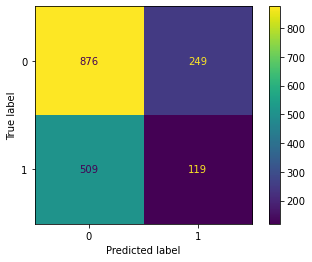

In [29]:
from xgboost import XGBClassifier
xgb= XGBClassifier(random_state=15)
xgb.fit(X_train, y_train)
y_pred_xgb= xgb.predict(X_test)
y_pred_prob_xgb= xgb.predict_proba(X_test)[:,1]

cm= confusion_matrix(y_test, y_pred_xgb, labels= xgb.classes_)
print(classification_report(y_test, y_pred_xgb, zero_division=0))
print('Precision:', precision_score(y_test, y_pred_xgb, zero_division=0))
print('Accuracy:', accuracy_score(y_test, y_pred_xgb))
print('AUC:', roc_auc_score(y_test, y_pred_prob_xgb))
dcm_xgb= ConfusionMatrixDisplay(cm, display_labels= xgb.classes_)
dcm_xgb.plot()

Fitting 5 folds for each of 3 candidates, totalling 15 fits
Best Parameters: {'learning_rate': 0.01}
Best Precision Score: 0.5366666666666666
              precision    recall  f1-score   support

           0       0.64      0.99      0.78      1125
           1       0.25      0.00      0.01       628

    accuracy                           0.64      1753
   macro avg       0.45      0.50      0.39      1753
weighted avg       0.50      0.64      0.50      1753

Precision: 0.25
Accuracy: 0.6394751853964632
AUC: 0.49780891719745224


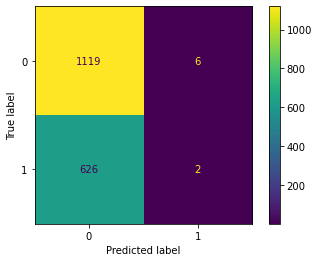

In [30]:
params_XGBoost= {'learning_rate': [0.01, 0.1, 1.0]}

gs_xgb= GridSearchCV(estimator= xgb, param_grid= params_XGBoost, cv= 5, scoring= 'precision', n_jobs= -1, verbose= 2)
gs_xgb.fit(X_train, y_train)

print("Best Parameters:", gs_xgb.best_params_)
print("Best Precision Score:", gs_xgb.best_score_)

tuned_xgb= gs_xgb.best_estimator_
y_pred_tuned_xgb= tuned_xgb.predict(X_test)
y_pred_prob_tuned_xgb= tuned_xgb.predict_proba(X_test)[:,1]


cm= confusion_matrix(y_test, y_pred_tuned_xgb, labels= tuned_xgb.classes_)
print(classification_report(y_test, y_pred_tuned_xgb, zero_division=0))
print('Precision:', precision_score(y_test, y_pred_tuned_xgb, zero_division=0))
print('Accuracy:', accuracy_score(y_test, y_pred_tuned_xgb))
print('AUC:', roc_auc_score(y_test, y_pred_prob_tuned_xgb))
dcm_tuned_xgb= ConfusionMatrixDisplay(cm, display_labels= tuned_xgb.classes_)
dcm_tuned_xgb.plot()

--- LGBM ---

[LightGBM] [Info] Number of positive: 2511, number of negative: 4499
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001986 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1165
[LightGBM] [Info] Number of data points in the train set: 7010, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.358203 -> initscore=-0.583174
[LightGBM] [Info] Start training from score -0.583174
              precision    recall  f1-score   support

           0       0.64      0.91      0.75      1125
           1       0.34      0.08      0.13       628

    accuracy                           0.61      1753
   macro avg       0.49      0.50      0.44      1753
weighted avg       0.53      0.61      0.53      1753

Precision: 0.33548387096774196
Accuracy: 0.6126640045636053
AUC: 0.5091295116772824


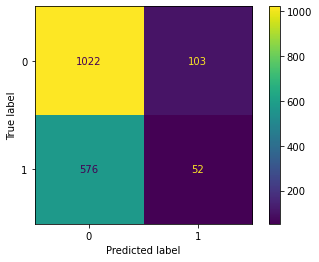

In [31]:
from lightgbm import LGBMClassifier
lgm= LGBMClassifier(random_state=15)
lgm.fit(X_train, y_train)
y_pred_lgm= lgm.predict(X_test)
y_pred_prob_lgm= lgm.predict_proba(X_test)[:,1]


cm= confusion_matrix(y_test, y_pred_lgm, labels= lgm.classes_)
print(classification_report(y_test, y_pred_lgm, zero_division=0))
print('Precision:', precision_score(y_test, y_pred_lgm, zero_division=0))
print('Accuracy:', accuracy_score(y_test, y_pred_lgm))
print('AUC:', roc_auc_score(y_test, y_pred_prob_lgm))
dcm_lgm= ConfusionMatrixDisplay(cm, display_labels= lgm.classes_)
dcm_lgm.plot()

Fitting 5 folds for each of 80 candidates, totalling 400 fits
[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=30
[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=30
[LightGBM] [Info] Number of positive: 2511, number of negative: 4499
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001774 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1165
[LightGBM] [Info] Number of data points in the train set: 7010, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.358203 -> initscore=-0.583174
[LightGBM] [Info] Start training from score -0.583174
Best Parameters: {'learning_rate': 0.01, 'min_data_in_leaf': 30, 'num_leaves': 127, 'reg_alpha': 0.1}
Best Precision Score: 0.5458333333333334
[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_s

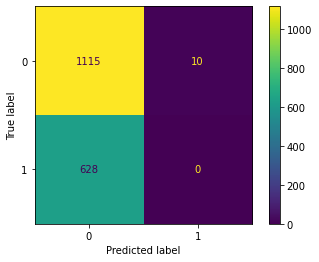

In [32]:
params_LGB= {'learning_rate': [0.001, 0.01, 0.1, 1.0],
             'num_leaves': [31, 127],
             'reg_alpha': [0.1, 0.5],
             'min_data_in_leaf': [30, 50, 100, 300, 400]}

gs_lgm= GridSearchCV(estimator= lgm, param_grid= params_LGB, cv=5, scoring='precision', n_jobs=-1, verbose=2)
gs_lgm.fit(X_train, y_train)

print("Best Parameters:", gs_lgm.best_params_)
print("Best Precision Score:", gs_lgm.best_score_)

tuned_lgm= gs_lgm.best_estimator_
y_pred_tuned_lgm= tuned_lgm.predict(X_test)
y_pred_prob_tuned_lgm= tuned_lgm.predict_proba(X_test)[:,1]


cm= confusion_matrix(y_test, y_pred_tuned_lgm, labels= tuned_lgm.classes_)
print(classification_report(y_test, y_pred_tuned_lgm, zero_division=0))
print('Precision:', precision_score(y_test, y_pred_tuned_lgm, zero_division=0))
print('Accuracy:', accuracy_score(y_test, y_pred_tuned_lgm))
print('AUC:', roc_auc_score(y_test, y_pred_prob_tuned_lgm))
dcm_tuned_lgm= ConfusionMatrixDisplay(cm, display_labels= tuned_lgm.classes_)
dcm_tuned_lgm.plot()

--- CatBoost ---

Learning rate set to 0.023662
0:	learn: 0.6909776	total: 158ms	remaining: 2m 37s
1:	learn: 0.6889479	total: 162ms	remaining: 1m 20s
2:	learn: 0.6869969	total: 168ms	remaining: 55.7s
3:	learn: 0.6851755	total: 173ms	remaining: 43s
4:	learn: 0.6833967	total: 177ms	remaining: 35.3s
5:	learn: 0.6816182	total: 183ms	remaining: 30.3s
6:	learn: 0.6799567	total: 187ms	remaining: 26.6s
7:	learn: 0.6783476	total: 192ms	remaining: 23.8s
8:	learn: 0.6767922	total: 197ms	remaining: 21.7s
9:	learn: 0.6753403	total: 201ms	remaining: 19.9s
10:	learn: 0.6740188	total: 207ms	remaining: 18.6s
11:	learn: 0.6725594	total: 214ms	remaining: 17.6s
12:	learn: 0.6711870	total: 219ms	remaining: 16.6s
13:	learn: 0.6699632	total: 225ms	remaining: 15.9s
14:	learn: 0.6687639	total: 231ms	remaining: 15.2s
15:	learn: 0.6675694	total: 236ms	remaining: 14.5s
16:	learn: 0.6663270	total: 239ms	remaining: 13.8s
17:	learn: 0.6652101	total: 242ms	remaining: 13.2s
18:	learn: 0.6643914	total: 245ms	remaining: 12.7s
19:	learn: 

188:	learn: 0.6090743	total: 887ms	remaining: 3.81s
189:	learn: 0.6088830	total: 891ms	remaining: 3.8s
190:	learn: 0.6086137	total: 896ms	remaining: 3.79s
191:	learn: 0.6083305	total: 899ms	remaining: 3.78s
192:	learn: 0.6081505	total: 903ms	remaining: 3.77s
193:	learn: 0.6079998	total: 906ms	remaining: 3.77s
194:	learn: 0.6078215	total: 913ms	remaining: 3.77s
195:	learn: 0.6075924	total: 921ms	remaining: 3.78s
196:	learn: 0.6074547	total: 928ms	remaining: 3.78s
197:	learn: 0.6072600	total: 934ms	remaining: 3.78s
198:	learn: 0.6071286	total: 942ms	remaining: 3.79s
199:	learn: 0.6069719	total: 948ms	remaining: 3.79s
200:	learn: 0.6067555	total: 954ms	remaining: 3.79s
201:	learn: 0.6064938	total: 960ms	remaining: 3.79s
202:	learn: 0.6063056	total: 966ms	remaining: 3.79s
203:	learn: 0.6061599	total: 972ms	remaining: 3.79s
204:	learn: 0.6059395	total: 978ms	remaining: 3.79s
205:	learn: 0.6058039	total: 985ms	remaining: 3.79s
206:	learn: 0.6055598	total: 991ms	remaining: 3.79s
207:	learn: 0

379:	learn: 0.5709332	total: 1.96s	remaining: 3.19s
380:	learn: 0.5706918	total: 1.96s	remaining: 3.19s
381:	learn: 0.5705285	total: 1.97s	remaining: 3.18s
382:	learn: 0.5703714	total: 1.97s	remaining: 3.18s
383:	learn: 0.5701791	total: 1.98s	remaining: 3.17s
384:	learn: 0.5699988	total: 1.98s	remaining: 3.16s
385:	learn: 0.5698137	total: 1.98s	remaining: 3.16s
386:	learn: 0.5695750	total: 1.99s	remaining: 3.15s
387:	learn: 0.5692963	total: 1.99s	remaining: 3.14s
388:	learn: 0.5690298	total: 2s	remaining: 3.14s
389:	learn: 0.5688061	total: 2s	remaining: 3.13s
390:	learn: 0.5685558	total: 2.01s	remaining: 3.13s
391:	learn: 0.5684003	total: 2.01s	remaining: 3.12s
392:	learn: 0.5682071	total: 2.02s	remaining: 3.11s
393:	learn: 0.5679528	total: 2.02s	remaining: 3.11s
394:	learn: 0.5677431	total: 2.02s	remaining: 3.1s
395:	learn: 0.5674834	total: 2.03s	remaining: 3.1s
396:	learn: 0.5672658	total: 2.04s	remaining: 3.09s
397:	learn: 0.5670525	total: 2.04s	remaining: 3.09s
398:	learn: 0.566786

539:	learn: 0.5373292	total: 2.85s	remaining: 2.42s
540:	learn: 0.5371401	total: 2.85s	remaining: 2.42s
541:	learn: 0.5369325	total: 2.86s	remaining: 2.42s
542:	learn: 0.5367050	total: 2.86s	remaining: 2.41s
543:	learn: 0.5365233	total: 2.87s	remaining: 2.41s
544:	learn: 0.5363051	total: 2.88s	remaining: 2.4s
545:	learn: 0.5361191	total: 2.88s	remaining: 2.4s
546:	learn: 0.5358492	total: 2.89s	remaining: 2.39s
547:	learn: 0.5356632	total: 2.89s	remaining: 2.39s
548:	learn: 0.5355096	total: 2.9s	remaining: 2.38s
549:	learn: 0.5352786	total: 2.91s	remaining: 2.38s
550:	learn: 0.5350671	total: 2.91s	remaining: 2.37s
551:	learn: 0.5348802	total: 2.92s	remaining: 2.37s
552:	learn: 0.5347444	total: 2.92s	remaining: 2.36s
553:	learn: 0.5345289	total: 2.93s	remaining: 2.36s
554:	learn: 0.5343182	total: 2.93s	remaining: 2.35s
555:	learn: 0.5342220	total: 2.94s	remaining: 2.35s
556:	learn: 0.5340106	total: 2.95s	remaining: 2.34s
557:	learn: 0.5337855	total: 2.95s	remaining: 2.34s
558:	learn: 0.5

718:	learn: 0.5031316	total: 3.74s	remaining: 1.46s
719:	learn: 0.5028765	total: 3.74s	remaining: 1.45s
720:	learn: 0.5027177	total: 3.74s	remaining: 1.45s
721:	learn: 0.5025062	total: 3.75s	remaining: 1.44s
722:	learn: 0.5022833	total: 3.75s	remaining: 1.44s
723:	learn: 0.5020791	total: 3.76s	remaining: 1.43s
724:	learn: 0.5018647	total: 3.76s	remaining: 1.43s
725:	learn: 0.5016197	total: 3.76s	remaining: 1.42s
726:	learn: 0.5014227	total: 3.77s	remaining: 1.41s
727:	learn: 0.5013079	total: 3.77s	remaining: 1.41s
728:	learn: 0.5011014	total: 3.77s	remaining: 1.4s
729:	learn: 0.5009541	total: 3.78s	remaining: 1.4s
730:	learn: 0.5008039	total: 3.78s	remaining: 1.39s
731:	learn: 0.5006560	total: 3.79s	remaining: 1.39s
732:	learn: 0.5004896	total: 3.79s	remaining: 1.38s
733:	learn: 0.5002355	total: 3.79s	remaining: 1.38s
734:	learn: 0.5000928	total: 3.8s	remaining: 1.37s
735:	learn: 0.4999265	total: 3.8s	remaining: 1.36s
736:	learn: 0.4997691	total: 3.81s	remaining: 1.36s
737:	learn: 0.49

898:	learn: 0.4726517	total: 4.45s	remaining: 500ms
899:	learn: 0.4724570	total: 4.45s	remaining: 495ms
900:	learn: 0.4722921	total: 4.46s	remaining: 490ms
901:	learn: 0.4721380	total: 4.46s	remaining: 485ms
902:	learn: 0.4719824	total: 4.46s	remaining: 480ms
903:	learn: 0.4719020	total: 4.47s	remaining: 475ms
904:	learn: 0.4717244	total: 4.47s	remaining: 470ms
905:	learn: 0.4714987	total: 4.48s	remaining: 464ms
906:	learn: 0.4713095	total: 4.48s	remaining: 459ms
907:	learn: 0.4711891	total: 4.48s	remaining: 454ms
908:	learn: 0.4710338	total: 4.49s	remaining: 449ms
909:	learn: 0.4709151	total: 4.49s	remaining: 444ms
910:	learn: 0.4707390	total: 4.5s	remaining: 439ms
911:	learn: 0.4706387	total: 4.5s	remaining: 434ms
912:	learn: 0.4704474	total: 4.5s	remaining: 429ms
913:	learn: 0.4703387	total: 4.51s	remaining: 424ms
914:	learn: 0.4701144	total: 4.51s	remaining: 419ms
915:	learn: 0.4699548	total: 4.51s	remaining: 414ms
916:	learn: 0.4697557	total: 4.52s	remaining: 409ms
917:	learn: 0.4

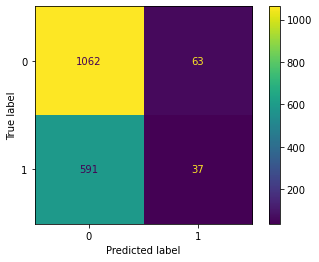

In [33]:
from catboost import CatBoostClassifier
cat= CatBoostClassifier(random_state=15)
cat.fit(X_train, y_train)
y_pred_cat= cat.predict(X_test)
y_pred_prob_cat= cat.predict_proba(X_test)[:,1]

cm= confusion_matrix(y_test, y_pred_cat, labels= cat.classes_)
print(classification_report(y_test, y_pred_cat, zero_division=0))
print('Precision:', precision_score(y_test, y_pred_cat, zero_division=0))
print('Accuracy:', accuracy_score(y_test, y_pred_cat))
print('AUC:', roc_auc_score(y_test, y_pred_prob_cat))
dcm_cat= ConfusionMatrixDisplay(cm, display_labels= cat.classes_)
dcm_cat.plot()

Fitting 5 folds for each of 36 candidates, totalling 180 fits
0:	learn: 0.6848224	total: 4.95ms	remaining: 243ms
1:	learn: 0.6781049	total: 8.14ms	remaining: 195ms
2:	learn: 0.6726203	total: 11.7ms	remaining: 183ms
3:	learn: 0.6681094	total: 15.5ms	remaining: 178ms
4:	learn: 0.6644032	total: 18.8ms	remaining: 170ms
5:	learn: 0.6614717	total: 21.9ms	remaining: 160ms
6:	learn: 0.6588348	total: 25.1ms	remaining: 154ms
7:	learn: 0.6566663	total: 30.9ms	remaining: 162ms
8:	learn: 0.6545584	total: 34.3ms	remaining: 156ms
9:	learn: 0.6528075	total: 37.4ms	remaining: 150ms
10:	learn: 0.6511949	total: 40.6ms	remaining: 144ms
11:	learn: 0.6498349	total: 44.8ms	remaining: 142ms
12:	learn: 0.6488716	total: 48.4ms	remaining: 138ms
13:	learn: 0.6478009	total: 51.6ms	remaining: 133ms
14:	learn: 0.6467746	total: 54.9ms	remaining: 128ms
15:	learn: 0.6455340	total: 58.5ms	remaining: 124ms
16:	learn: 0.6448354	total: 61.7ms	remaining: 120ms
17:	learn: 0.6439034	total: 64.8ms	remaining: 115ms
18:	learn: 0

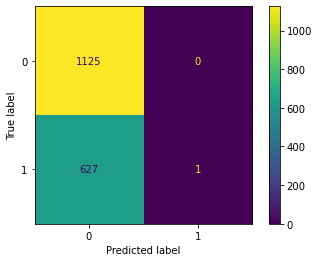

In [34]:
params_CatBoost= {
                  'depth': [3,5,10],
                  'learning_rate' : [0.01,0.1,1],
                  'iterations' : [5,10,50,100]
                 }

gs_cat= GridSearchCV(estimator= cat, param_grid= params_CatBoost, cv=5, scoring='precision', n_jobs=-1, verbose=2)
gs_cat.fit(X_train, y_train)

print("Best Parameters:", gs_cat.best_params_)
print("Best Precision Score:", gs_cat.best_score_)

tuned_cat= gs_cat.best_estimator_
y_pred_tuned_cat= tuned_cat.predict(X_test)
y_pred_prob_tuned_cat= tuned_cat.predict_proba(X_test)[:,1]

cm= confusion_matrix(y_test, y_pred_tuned_cat, labels= tuned_cat.classes_)
print(classification_report(y_test, y_pred_tuned_cat, zero_division=0))
print('Precision:', precision_score(y_test, y_pred_tuned_cat, zero_division=0))
print('Accuracy:', accuracy_score(y_test, y_pred_tuned_cat))
print('AUC:', roc_auc_score(y_test, y_pred_prob_tuned_cat))
dcm_tuned_cat= ConfusionMatrixDisplay(cm, display_labels= tuned_cat.classes_)
dcm_tuned_cat.plot()

In [35]:
from pycaret.classification import *
s= setup(df, target = 'Heart Attack Risk_1')

,Description,Value
0,Session id,2636
1,Target,Heart Attack Risk_1
2,Target type,Binary
3,Original data shape,"(8763, 24)"
4,Transformed data shape,"(8763, 24)"
5,Transformed train set shape,"(6134, 24)"
6,Transformed test set shape,"(2629, 24)"
7,Numeric features,23
8,Preprocess,True
9,Imputation type,simple


In [36]:
best_model= compare_models(sort='Precision')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ada,Ada Boost Classifier,0.6373,0.5079,0.0241,0.4030,0.0453,0.0045,0.0126,0.1800
lightgbm,Light Gradient Boosting Machine,0.6200,0.4963,0.1020,0.3836,0.1610,0.0131,0.0176,0.1180
xgboost,Extreme Gradient Boosting,0.5854,0.4982,0.2007,0.3596,0.2574,0.0010,0.0012,0.0900
qda,Quadratic Discriminant Analysis,0.6157,0.4971,0.0915,0.3585,0.1454,-0.0002,-0.0001,0.0180
knn,K Neighbors Classifier,0.5703,0.4944,0.2453,0.3571,0.2901,-0.0030,-0.0027,0.0770
dt,Decision Tree Classifier,0.5316,0.4935,0.3591,0.3505,0.3545,-0.0127,-0.0128,0.0340
et,Extra Trees Classifier,0.6338,0.4988,0.0255,0.3501,0.0474,-0.0015,-0.0029,0.2380
catboost,CatBoost Classifier,0.6257,0.5010,0.0492,0.3430,0.0858,-0.0042,-0.0074,1.8230
gbc,Gradient Boosting Classifier,0.6351,0.4967,0.0173,0.3320,0.0327,-0.0035,-0.0089,0.4470
rf,Random Forest Classifier,0.6330,0.5022,0.0237,0.3293,0.0441,-0.0041,-0.0098,0.3540


Processing:   0%|          | 0/69 [00:00<?, ?it/s]

In [37]:
print(best_model)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator='deprecated',
                   estimator=None, learning_rate=1.0, n_estimators=50,
                   random_state=2636)


In [38]:
tuned_best_model = tune_model(best_model)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6417,0.4909,0.0000,0.0000,0.0000,0.0000,0.0000
1,0.6417,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000
2,0.6417,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000
3,0.6417,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000
4,0.6427,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000
5,0.6427,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000
6,0.6427,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000
7,0.6411,0.4979,0.0000,0.0000,0.0000,0.0000,0.0000
8,0.6411,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


--- Visualisation ---

In [39]:
print('Logistic Regression Precision:', precision_score(y_test, y_pred_lr, zero_division= 0))
print('Decision Tree Precision:', precision_score(y_test, y_pred_dt, zero_division= 0))
print('Tuned Decision Tree Precision:', precision_score(y_test, y_pred_tuned_dt, zero_division= 0))
print('KNeighborsClassifier Precision:', precision_score(y_test, y_pred_knn, zero_division= 0))
print('Tuned KNeighborsClassifier Precision:', precision_score(y_test, y_pred_tuned_knn, zero_division= 0))
print('GaussianNB Precision:', precision_score(y_test, y_pred_nb, zero_division= 0))
print('SVM Precision:', precision_score(y_test, y_pred_svc, zero_division= 0))
print('Random Forest Precision:', precision_score(y_test, y_pred_rf, zero_division= 0))
print('Tuned Random Forest Precision:', precision_score(y_test, y_pred_tuned_rf, zero_division= 0))
print('AdaBoost Precision:', precision_score(y_test, y_pred_ada, zero_division= 0))
print('Tuned AdaBoost Precision:', precision_score(y_test, y_pred_tuned_ada, zero_division= 0))
print('GradientBoosting Precision:', precision_score(y_test, y_pred_grb, zero_division= 0))
print('Tuned GradientBoosting Precision:', precision_score(y_test, y_pred_tuned_grb, zero_division= 0))
print('XGB Precision:', precision_score(y_test, y_pred_xgb, zero_division= 0))
print('Tuned XGB Precision:', precision_score(y_test, y_pred_tuned_xgb, zero_division= 0))
print('LGBM Precision:', precision_score(y_test, y_pred_lgm, zero_division= 0))
print('Tuned LGBM Precision:', precision_score(y_test, y_pred_tuned_lgm, zero_division= 0))
print('CatBoost Precision:', precision_score(y_test, y_pred_cat, zero_division= 0))
print('Tuned CatBoost Precision:', precision_score(y_test, y_pred_tuned_cat, zero_division= 0))

Logistic Regression Precision: 0.0
Decision Tree Precision: 0.3476968796433878
Tuned Decision Tree Precision: 0.3821428571428571
KNeighborsClassifier Precision: 0.3615023474178404
Tuned KNeighborsClassifier Precision: 0.4262295081967213
GaussianNB Precision: 0.0
SVM Precision: 0.0
Random Forest Precision: 0.2765957446808511
Tuned Random Forest Precision: 0.2857142857142857
AdaBoost Precision: 0.28
Tuned AdaBoost Precision: 0.375
GradientBoosting Precision: 0.3
Tuned GradientBoosting Precision: 0.3
XGB Precision: 0.3233695652173913
Tuned XGB Precision: 0.25
LGBM Precision: 0.33548387096774196
Tuned LGBM Precision: 0.0
CatBoost Precision: 0.37
Tuned CatBoost Precision: 1.0


In [40]:
precision_scores= {
                    'Logistic Regression Precision:': precision_score(y_test, y_pred_lr, zero_division= 0),
                    'Decision Tree Precision:': precision_score(y_test, y_pred_dt, zero_division= 0),
                    'Tuned Decision Tree Precision:': precision_score(y_test, y_pred_tuned_dt, zero_division= 0),
                    'KNeighborsClassifier Precision:': precision_score(y_test, y_pred_knn, zero_division= 0),
                    'Tuned KNeighborsClassifier Precision:': precision_score(y_test, y_pred_tuned_knn, zero_division= 0),
                    'GaussianNB Precision:': precision_score(y_test, y_pred_nb, zero_division= 0),
                    'SVM Precision:': precision_score(y_test, y_pred_svc, zero_division= 0),
                    'Random Forest Precision:': precision_score(y_test, y_pred_rf, zero_division= 0),
                    'Tuned Random Forest Precision:': precision_score(y_test, y_pred_tuned_rf, zero_division= 0),
                    'AdaBoost Precision:': precision_score(y_test, y_pred_ada, zero_division= 0),
                    'Tuned AdaBoost Precision:': precision_score(y_test, y_pred_tuned_ada, zero_division= 0),
                    'GradientBoosting Precision:': precision_score(y_test, y_pred_grb, zero_division= 0),
                    'Tuned GradientBoosting Precision:': precision_score(y_test, y_pred_tuned_grb, zero_division= 0),
                    'XGB Precision:': precision_score(y_test, y_pred_xgb, zero_division= 0),
                    'Tuned XGB Precision:': precision_score(y_test, y_pred_tuned_xgb, zero_division= 0),
                    'LGBM Precision:': precision_score(y_test, y_pred_lgm, zero_division= 0),
                    'Tuned LGBM Precision:': precision_score(y_test, y_pred_tuned_lgm, zero_division= 0),
                    'CatBoost Precision:': precision_score(y_test, y_pred_cat, zero_division= 0),
                    'Tuned CatBoost Precision:': precision_score(y_test, y_pred_tuned_cat, zero_division= 0)
                  }

ml_precision= pd.DataFrame(list(precision_scores.items()), columns= ['Model', 'Precision Score'])
ml_precision= ml_precision.sort_values(by= 'Precision Score', ascending=False)
print(ml_precision)

                                    Model  Precision Score
18              Tuned CatBoost Precision:         1.000000
4   Tuned KNeighborsClassifier Precision:         0.426230
2          Tuned Decision Tree Precision:         0.382143
10              Tuned AdaBoost Precision:         0.375000
17                    CatBoost Precision:         0.370000
3         KNeighborsClassifier Precision:         0.361502
1                Decision Tree Precision:         0.347697
15                        LGBM Precision:         0.335484
13                         XGB Precision:         0.323370
12      Tuned GradientBoosting Precision:         0.300000
11            GradientBoosting Precision:         0.300000
8          Tuned Random Forest Precision:         0.285714
9                     AdaBoost Precision:         0.280000
7                Random Forest Precision:         0.276596
14                   Tuned XGB Precision:         0.250000
6                          SVM Precision:         0.0000

In [41]:
accuracy_scores= {
                    'Logistic Regression Accuracy:': accuracy_score(y_test, y_pred_lr),
                    'Decision Tree Accuracy:': accuracy_score(y_test, y_pred_dt),
                    'Tuned Decision Tree Accuracy:': accuracy_score(y_test, y_pred_tuned_dt),
                    'KNeighborsClassifier Accuracy:': accuracy_score(y_test, y_pred_knn),
                    'Tuned KNeighborsClassifier Accuracy:': accuracy_score(y_test, y_pred_tuned_knn),
                    'GaussianNB Accuracy:': accuracy_score(y_test, y_pred_nb),
                    'SVM Accuracy:': accuracy_score(y_test, y_pred_svc),
                    'Random Forest Accuracy:': accuracy_score(y_test, y_pred_rf),
                    'Tuned Random Forest Accuracy:': accuracy_score(y_test, y_pred_tuned_rf),
                    'AdaBoost Accuracy:': accuracy_score(y_test, y_pred_ada),
                    'Tuned AdaBoost Accuracy:': accuracy_score(y_test, y_pred_tuned_ada),
                    'GradientBoosting Accuracy:': accuracy_score(y_test, y_pred_grb),
                    'Tuned GradientBoosting Accuracy:': accuracy_score(y_test, y_pred_tuned_grb),
                    'XGB Accuracy:': accuracy_score(y_test, y_pred_xgb),
                    'Tuned XGB Accuracy:': accuracy_score(y_test, y_pred_tuned_xgb),
                    'LGBM Accuracy:': accuracy_score(y_test, y_pred_lgm),
                    'Tuned LGBM Accuracy:': accuracy_score(y_test, y_pred_tuned_lgm),
                    'CatBoost Accuracy:': accuracy_score(y_test, y_pred_cat),
                    'Tuned CatBoost Accuracy:': accuracy_score(y_test, y_pred_tuned_cat)
                  }

ml_accuracy= pd.DataFrame(list(accuracy_scores.items()), columns= ['Model', 'Accuracy Score'])
ml_accuracy= ml_accuracy.sort_values(by= 'Accuracy Score', ascending=False)
print(ml_accuracy)

                                   Model  Accuracy Score
18              Tuned CatBoost Accuracy:        0.642327
5                   GaussianNB Accuracy:        0.641757
6                          SVM Accuracy:        0.641757
0          Logistic Regression Accuracy:        0.641757
8          Tuned Random Forest Accuracy:        0.640046
14                   Tuned XGB Accuracy:        0.639475
4   Tuned KNeighborsClassifier Accuracy:        0.636623
10              Tuned AdaBoost Accuracy:        0.636052
16                  Tuned LGBM Accuracy:        0.636052
9                     AdaBoost Accuracy:        0.635482
11            GradientBoosting Accuracy:        0.634912
12      Tuned GradientBoosting Accuracy:        0.634912
7                Random Forest Accuracy:        0.629778
17                    CatBoost Accuracy:        0.626925
15                        LGBM Accuracy:        0.612664
2          Tuned Decision Tree Accuracy:        0.604107
3         KNeighborsClassifier 

In [42]:
auc_scores= {
                    'Logistic Regression AUC:': roc_auc_score(y_test, y_pred_prob_lr),
                    'Decision Tree AUC:': roc_auc_score(y_test, y_pred_prob_dt),
                    'Tuned Decision Tree AUC:': roc_auc_score(y_test, y_pred_prob_tuned_dt),
                    'KNeighborsClassifier AUC:': roc_auc_score(y_test, y_pred_prob_knn),
                    'Tuned KNeighborsClassifier AUC:': roc_auc_score(y_test, y_pred_prob_tuned_knn),
                    'GaussianNB AUC:': roc_auc_score(y_test, y_pred_prob_nb),
                    'SVM AUC:': roc_auc_score(y_test, y_pred_prob_svc),
                    'Random Forest AUC:': roc_auc_score(y_test, y_pred_prob_rf),
                    'Tuned Random Forest AUC:': roc_auc_score(y_test, y_pred_prob_tuned_rf),
                    'AdaBoost AUC:': roc_auc_score(y_test, y_pred_prob_ada),
                    'Tuned AdaBoost AUC:': roc_auc_score(y_test, y_pred_prob_tuned_ada),
                    'GradientBoosting AUC:': roc_auc_score(y_test, y_pred_prob_grb),
                    'Tuned GradientBoosting AUC:': roc_auc_score(y_test, y_pred_prob_tuned_grb),
                    'XGB AUC:': roc_auc_score(y_test, y_pred_prob_xgb),
                    'Tuned XGB AUC:': roc_auc_score(y_test, y_pred_prob_tuned_xgb),
                    'LGBM AUC:': roc_auc_score(y_test, y_pred_prob_lgm),
                    'Tuned LGBM AUC:': roc_auc_score(y_test, y_pred_prob_tuned_lgm),
                    'CatBoost AUC:': roc_auc_score(y_test, y_pred_prob_cat),
                    'Tuned CatBoost AUC:': roc_auc_score(y_test, y_pred_prob_tuned_cat)
                  }

ml_auc= pd.DataFrame(list(auc_scores.items()), columns= ['Model', 'AUC Score'])
ml_auc= ml_auc.sort_values(by= 'AUC Score', ascending=False)
print(ml_auc)

                              Model  AUC Score
16                  Tuned LGBM AUC:   0.518545
17                    CatBoost AUC:   0.516671
6                          SVM AUC:   0.514461
15                        LGBM AUC:   0.509130
7                Random Forest AUC:   0.508728
12      Tuned GradientBoosting AUC:   0.508570
11            GradientBoosting AUC:   0.508570
18              Tuned CatBoost AUC:   0.505881
2          Tuned Decision Tree AUC:   0.503986
8          Tuned Random Forest AUC:   0.502709
14                   Tuned XGB AUC:   0.497809
4   Tuned KNeighborsClassifier AUC:   0.494048
3         KNeighborsClassifier AUC:   0.491197
1                Decision Tree AUC:   0.491195
10              Tuned AdaBoost AUC:   0.489227
5                   GaussianNB AUC:   0.487829
13                         XGB AUC:   0.486361
9                     AdaBoost AUC:   0.479635
0          Logistic Regression AUC:   0.478992


Logistic Regression Precision: 0.0
Decision Tree Precision: 0.3476968796433878
Tuned Decision Tree Precision: 0.3821428571428571


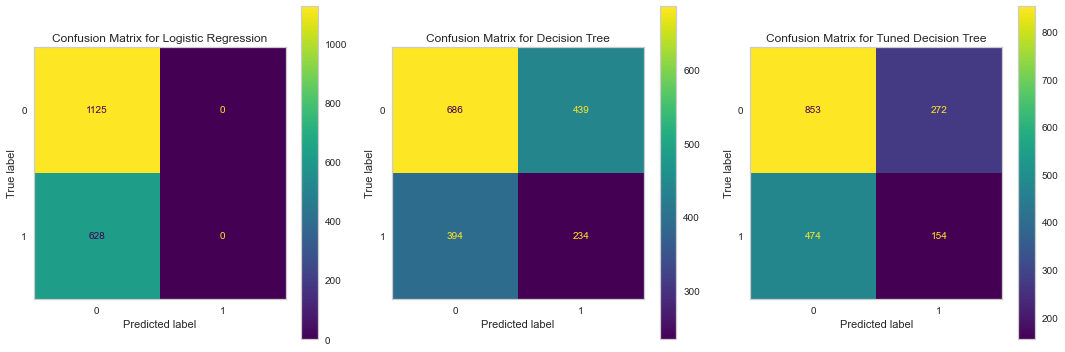

In [43]:
fig, axes= plt.subplots(1, 3, figsize= (15, 5))

print('Logistic Regression Precision:', precision_score(y_test, y_pred_lr, zero_division= 0))
print('Decision Tree Precision:', precision_score(y_test, y_pred_dt, zero_division= 0))
print('Tuned Decision Tree Precision:', precision_score(y_test, y_pred_tuned_dt, zero_division= 0))

dcm_lr.plot(ax= axes[0])
axes[0].set_title('Confusion Matrix for Logistic Regression')
axes[0].grid(linewidth= 0)

dcm_dt.plot(ax= axes[1])
axes[1].set_title('Confusion Matrix for Decision Tree')
axes[1].grid(linewidth= 0)

dcm_knn.plot(ax= axes[2])
axes[2].set_title('Confusion Matrix for Tuned Decision Tree')
axes[2].grid(linewidth= 0)

plt.tight_layout()
plt.show()

KNeighborsClassifier Precision: 0.3615023474178404
Tuned KNeighborsClassifier Precision: 0.4262295081967213
GaussianNB Precision: 0.0


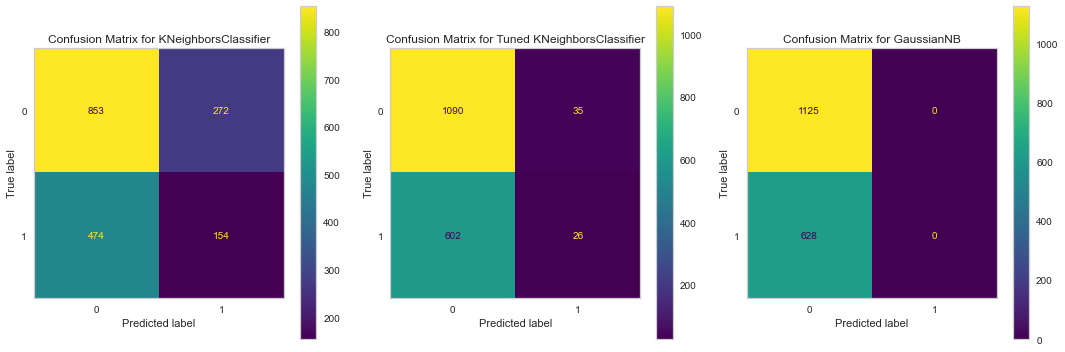

In [44]:
fig, axes= plt.subplots(1, 3, figsize= (15, 5))
print('KNeighborsClassifier Precision:', precision_score(y_test, y_pred_knn, zero_division= 0))
print('Tuned KNeighborsClassifier Precision:', precision_score(y_test, y_pred_tuned_knn, zero_division= 0))
print('GaussianNB Precision:', precision_score(y_test, y_pred_nb, zero_division= 0))

dcm_knn.plot(ax= axes[0])
axes[0].set_title('Confusion Matrix for KNeighborsClassifier')
axes[0].grid(linewidth= 0)

dcm_tuned_knn.plot(ax= axes[1])
axes[1].set_title('Confusion Matrix for Tuned KNeighborsClassifier')
axes[1].grid(linewidth= 0)

dcm_nb.plot(ax= axes[2])
axes[2].set_title('Confusion Matrix for GaussianNB')
axes[2].grid(linewidth= 0)

plt.tight_layout()
plt.show()

SVM Precision: 0.0
Random Forest Precision: 0.2765957446808511
Tuned Random Forest Precision: 0.2857142857142857


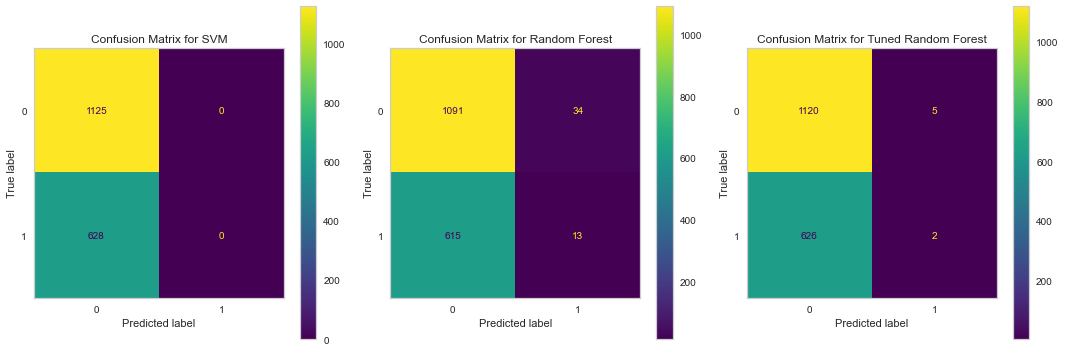

In [45]:
fig, axes= plt.subplots(1, 3, figsize= (15, 5))
print('SVM Precision:', precision_score(y_test, y_pred_svc, zero_division=0))
print('Random Forest Precision:', precision_score(y_test, y_pred_rf, zero_division=0))
print('Tuned Random Forest Precision:', precision_score(y_test, y_pred_tuned_rf, zero_division=0))

dcm_svc.plot(ax= axes[0])
axes[0].set_title('Confusion Matrix for SVM')
axes[0].grid(linewidth= 0)

dcm_rf.plot(ax= axes[1])
axes[1].set_title('Confusion Matrix for Random Forest')
axes[1].grid(linewidth= 0)

dcm_tuned_rf.plot(ax= axes[2])
axes[2].set_title('Confusion Matrix for Tuned Random Forest')
axes[2].grid(linewidth= 0)

plt.tight_layout()
plt.show()

AdaBoost Precision: 0.28
Tuned AdaBoost Precision: 0.375
GradientBoosting Precision: 0.3


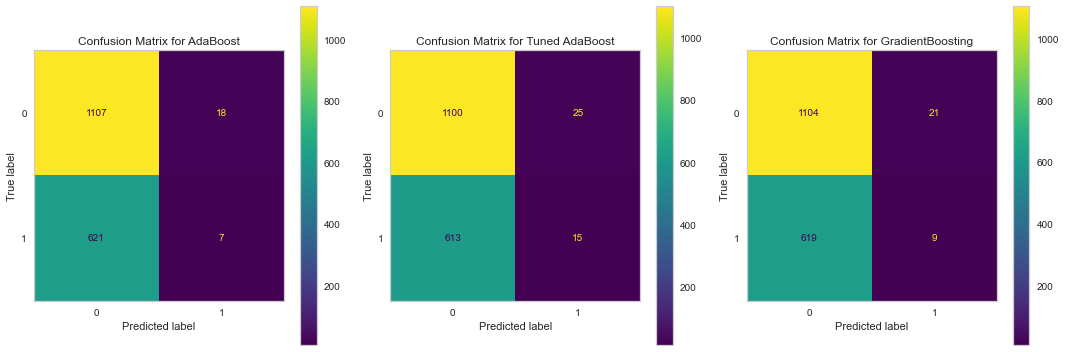

In [46]:
fig, axes= plt.subplots(1, 3, figsize= (15, 5))

print('AdaBoost Precision:', precision_score(y_test, y_pred_ada, zero_division=0))
print('Tuned AdaBoost Precision:', precision_score(y_test, y_pred_tuned_ada, zero_division=0))
print('GradientBoosting Precision:', precision_score(y_test, y_pred_grb, zero_division=0))

dcm_ada.plot(ax= axes[0])
axes[0].set_title('Confusion Matrix for AdaBoost')
axes[0].grid(linewidth= 0)

dcm_tuned_ada.plot(ax= axes[1])
axes[1].set_title('Confusion Matrix for Tuned AdaBoost')
axes[1].grid(linewidth= 0)

dcm_grb.plot(ax= axes[2])
axes[2].set_title('Confusion Matrix for GradientBoosting')
axes[2].grid(linewidth= 0)

plt.tight_layout()
plt.show()

Tuned GradientBoosting Precision: 0.3
XGB Precision: 0.3233695652173913
Tuned XGB Precision: 0.25


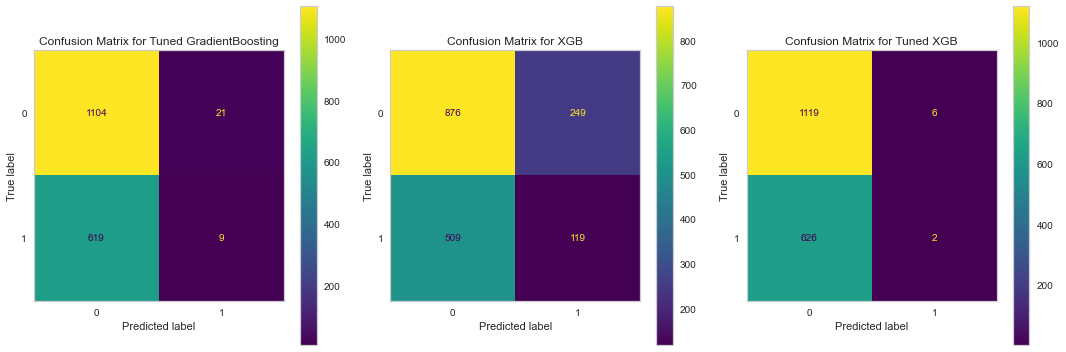

In [47]:
fig, axes= plt.subplots(1, 3, figsize= (15, 5))

print('Tuned GradientBoosting Precision:', precision_score(y_test, y_pred_tuned_grb, zero_division=0))
print('XGB Precision:', precision_score(y_test, y_pred_xgb, zero_division=0))
print('Tuned XGB Precision:', precision_score(y_test, y_pred_tuned_xgb, zero_division=0))

dcm_tuned_grb.plot(ax= axes[0])
axes[0].set_title('Confusion Matrix for Tuned GradientBoosting')
axes[0].grid(linewidth= 0)

dcm_xgb.plot(ax= axes[1])
axes[1].set_title('Confusion Matrix for XGB')
axes[1].grid(linewidth= 0)

dcm_tuned_xgb.plot(ax= axes[2])
axes[2].set_title('Confusion Matrix for Tuned XGB')
axes[2].grid(linewidth= 0)

plt.tight_layout()
plt.show()

LGBM Precision: 0.33548387096774196
Tuned LGBM Precision: 0.0
CatBoost Precision: 0.37
Tuned CatBoost Precision: 1.0


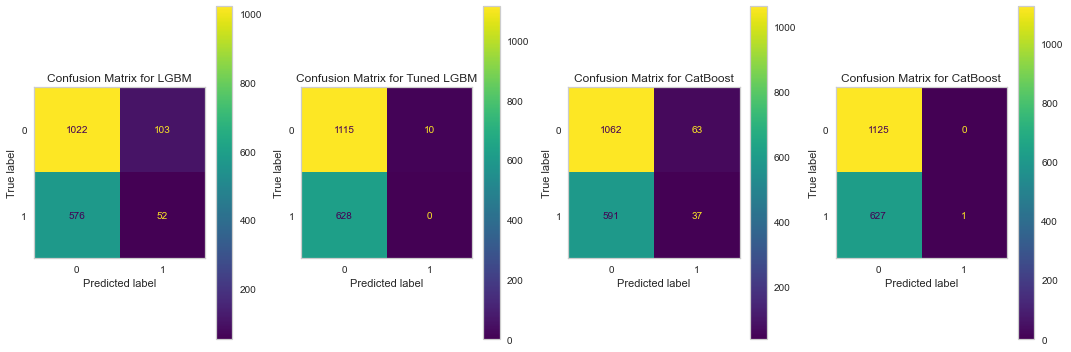

In [48]:
fig, axes= plt.subplots(1, 4, figsize= (15, 5))

print('LGBM Precision:', precision_score(y_test, y_pred_lgm, zero_division=0))
print('Tuned LGBM Precision:', precision_score(y_test, y_pred_tuned_lgm, zero_division=0))
print('CatBoost Precision:', precision_score(y_test, y_pred_cat, zero_division=0))
print('Tuned CatBoost Precision:', precision_score(y_test, y_pred_tuned_cat, zero_division=0))

dcm_lgm.plot(ax= axes[0])
axes[0].set_title('Confusion Matrix for LGBM')
axes[0].grid(linewidth= 0)

dcm_tuned_lgm.plot(ax= axes[1])
axes[1].set_title('Confusion Matrix for Tuned LGBM')
axes[1].grid(linewidth= 0)

dcm_cat.plot(ax= axes[2])
axes[2].set_title('Confusion Matrix for CatBoost')
axes[2].grid(linewidth= 0)

dcm_tuned_cat.plot(ax= axes[3])
axes[3].set_title('Confusion Matrix for CatBoost')
axes[3].grid(linewidth= 0)

plt.tight_layout()
plt.show()